In [1]:
# BACKUP DAS KW - Cria uma variável com as leituras do arquivo, para caso este seja sobrescrito.
fileHandle= open('kw_learn_negative.txt', 'r')
mem = fileHandle.readlines()
fileHandle.close()

FileNotFoundError: [Errno 2] No such file or directory: 'kw_learn_negative.txt'

## MATERIAL DE APRENDIZADO PARA A RN

In [2]:
import newspaper # Biblioteca que analisa noticias com suporte a Natural Language Processing em Português
import time # Habilita um delay entre os crawls/scraps para que não sufoque os sites acessados, acarretando bloqueio.
from newspaper import Article

In [3]:
kw_list = [] # cria uma lista em branco

fileHandle = open('train_news_negative_results.txt','r') #Opens the log file of interest
url_news = fileHandle.readlines() #reads the logfile contents into memory as a list
fileHandle.close() # fecha o arquivo para não travar a proxima abertura

In [4]:
def get_kw(url):
    article = Article(url, fetch_images=False, language='pt', request_timeout=200) # Leitura de artigos individualmente, e não baixa as imagens.
    article.download() # baixa
    article.parse() # prepara
    article.nlp() # processa
    print(article.title)
    print(article.publish_date)
    print(article.keywords)
    kw_list.append(article.keywords) # concatena as keywords na lista criada anteriormente
    time.sleep(5) 

In [5]:
print("Getting Keywords from {} articles".format(len(url_news)))
for url in url_news: # para cada url no arquivo lido
    print("URL {}".format(url_news.index(url)))
    url = url.strip() # corta as pontas do link, removendo quebra-linhas e espaços
    try:
        get_kw(url) # chama a função para extrair kw de cada url
        print("done with: ",url)
        print("\n")
    except:
        print("Uh oh! We got an error. NEXT!")
print("done!")

Getting Keywords from 28 articles
URL 0
Homem é preso com quatro quilos de maconha e armas de fogo em Rio Pardo de Minas
2019-02-14 00:00:00
['minas', 'fogo', 'suspeito', 'receberam', 'sacos', 'homem', 'plásticos', 'quilos', 'maconha', 'rio', 'armas', 'preso', 'pardo']
done with:  https://g1.globo.com/mg/grande-minas/noticia/2019/02/14/homem-e-preso-com-quatro-quilos-de-maconha-e-armas-de-fogo-em-rio-pardo-de-minas.ghtml


URL 1
Dono de clínicas psiquiátricas é indiciado por posse de armas de uso restrito, diz polícia
2019-02-13 00:00:00
['uso', 'encontradas', 'clínicas', 'dono', 'polícia', 'paraná', 'restrito', 'público', 'posse', 'nicolau', 'paulo', 'inquérito', 'psiquiátricas', 'preso', 'indiciado', 'armas']
done with:  https://g1.globo.com/pr/norte-noroeste/noticia/2019/02/13/dono-de-clinicas-psiquiatricas-e-indiciado-por-posse-de-armas-de-uso-restrito-diz-policia.ghtml


URL 2
PM apreende cinco armas de fogo durante madrugada deste sábado
2019-02-16 09:12:14-03:00
['calibre', 'del

done with:  http://www.agencia.ac.gov.br/policias-civil-e-militar-apreendem-dinheiro-droga-arma-e-municao-em-senador-guiomard/


URL 21
Quase 30 armas de clube de tiro de SP agora estão nas ruas
2019-02-27 20:21:18+00:00
['calibre', 'sp', 'quase', 'arma', 'polícia', 'roubo', 'ruas', 'segurança', 'clube', 'gente', '30', 'tiro', 'armas', 'mercado']
done with:  https://ponte.org/quase-30-armas-de-clube-de-tiro-de-sp-agora-estao-nas-ruas/


URL 22
Trio é preso tentando arremessar granada caseira e armas para dentro de presídio do Complexo do Curado
2019-02-28 00:00:00
['guarita', 'arremessar', 'policial', 'presos', 'complexo', 'recife', 'tentando', 'fuga', 'presídio', 'fogo', 'trio', 'granada', 'caseira', 'curado', 'armas', 'preso']
done with:  https://g1.globo.com/pe/pernambuco/noticia/2019/02/28/trio-e-preso-tentando-arremessar-armas-e-granada-caseira-para-dentro-de-presidio-do-complexo-do-curado.ghtml


URL 23
Homem é preso pelo 8º BPM por porte ilegal de arma de fogo em Paraíso do Toca

In [6]:
# kw_list resulta em uma lista de listas. abaixo os elementos são listados em uma única lista.
# exemplo: [[1,2,3],[4,5,6],[7,8,9]] --> [1,2,3,4,5,6,7,8,9]

def kw_clear():
    kw_learn=[] # lista utilizável para aprendizado, já limpa e organizável
    for kw in kw_list: # para cada lista de kw, na lista de listas de kws.
        for sub_kw in kw: # para cada kw dentro da lista de kws.
            kw_learn.append(sub_kw)
            #print(kw_learn)
    return sorted(kw_learn,key=kw_learn.count,reverse=True) # ordena as kw por ordem de frequência de aparecimento nas noticias
kw_learn = kw_clear();

In [7]:
## Salva as KW para análise posterior
with open('kw_learn_negative.txt', 'w') as f:
    for item in kw_learn:
        f.write("%s\n" % item)
    f.close()

Análise das Keywords

In [8]:
## Abre as KW
fileHandle = open('kw_learn_negative.txt', 'r')
kw_learn = fileHandle.readlines()
fileHandle.close()

In [9]:
len(kw_learn)

423

In [10]:
kw_learn = kw_clear();

In [11]:
import collections
a = kw_learn
counter=collections.Counter(a)
#print(counter)
#print(counter.values())
#print(counter.keys())
print(counter.most_common(50))

[('arma', 18), ('polícia', 12), ('fogo', 10), ('preso', 9), ('armas', 8), ('disparo', 7), ('pm', 6), ('suspeito', 5), ('homem', 5), ('policial', 5), ('munições', 4), ('policiais', 4), ('posse', 3), ('calibre', 3), ('pistola', 3), ('porte', 3), ('drogas', 3), ('jovem', 3), ('tráfico', 3), ('receberam', 2), ('maconha', 2), ('uso', 2), ('delegacia', 2), ('revólver', 2), ('38', 2), ('apreende', 2), ('ilegal', 2), ('presos', 2), ('operação', 2), ('equipe', 2), ('flagrante', 2), ('munição', 2), ('segundafeira', 2), ('jovens', 2), ('militar', 2), ('detido', 2), ('notícias', 2), ('whatsapp', 2), ('eleições', 2), ('massa', 2), ('laranjas', 2), ('mensagens', 2), ('serviços', 2), ('eleitoral', 2), ('juiz', 2), ('militares', 2), ('justiça', 2), ('tentando', 2), ('êxito', 2), ('tenta', 2)]


In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Visualização dos dados

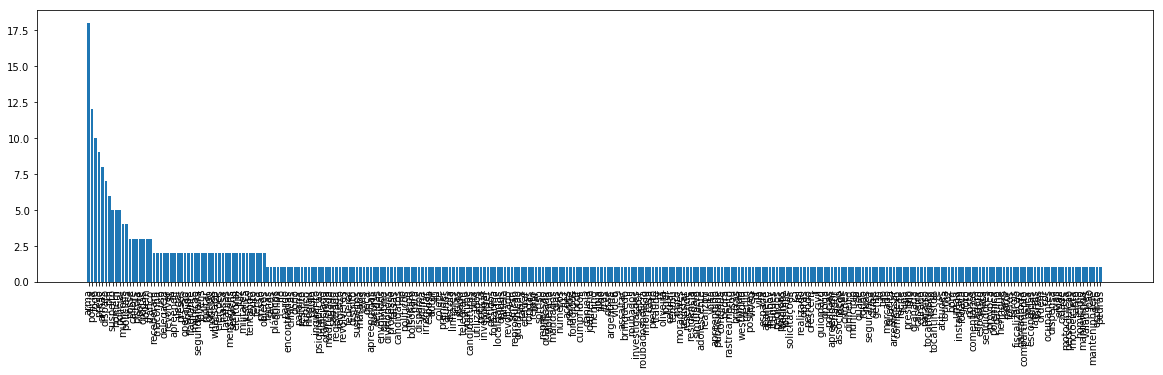

In [13]:
a = counter
plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.bar(range(len(a)), list(a.values()), align='center')
plt.xticks(range(len(a)), list(a.keys()))
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.show()

In [14]:
## Separa o dict gerada pela selecao de 50 palavras mais comuns em duas listas

i=0
words=[]
occurrences=[]
a = counter.most_common(50) # Pega as 50 palavras mais comuns
for i in range(len(a)):
    words.append(a[i][0])
    occurrences.append(a[i][1])
#print(words)
#print(occurrences)

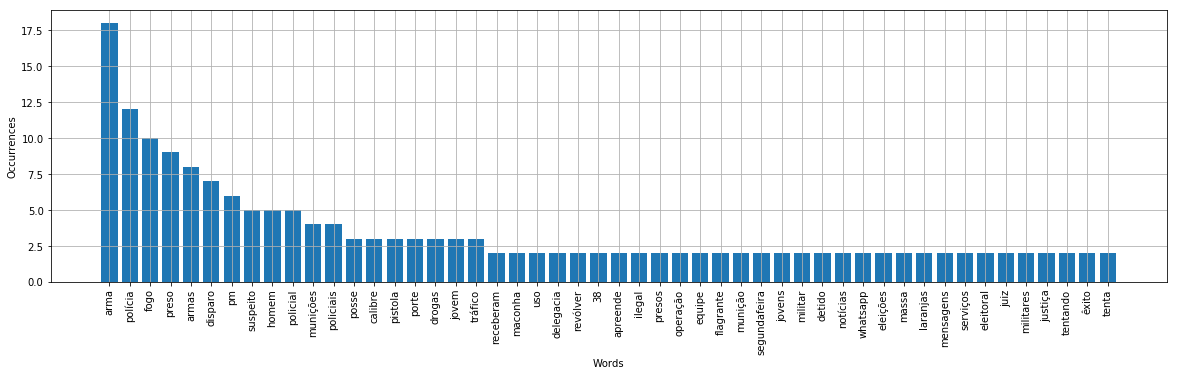

In [15]:
## Analise visual da ocorrencia de palavras

plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.subplot(111) # coordenadas do grafico a ser plotado.
plt.bar(words,occurrences)
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.grid()
plt.show()